In [14]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Importando o dataset**

In [8]:
im_shape = (64, 64)
TRAINING_DIR = 'archive/train'
TEST_DIR = 'archive/test'

seed = 10

BATCH_SIZE = 32

In [15]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [16]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [17]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 27774 images belonging to 21 classes.
Found 6940 images belonging to 21 classes.
Found 11548 images belonging to 21 classes.
Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


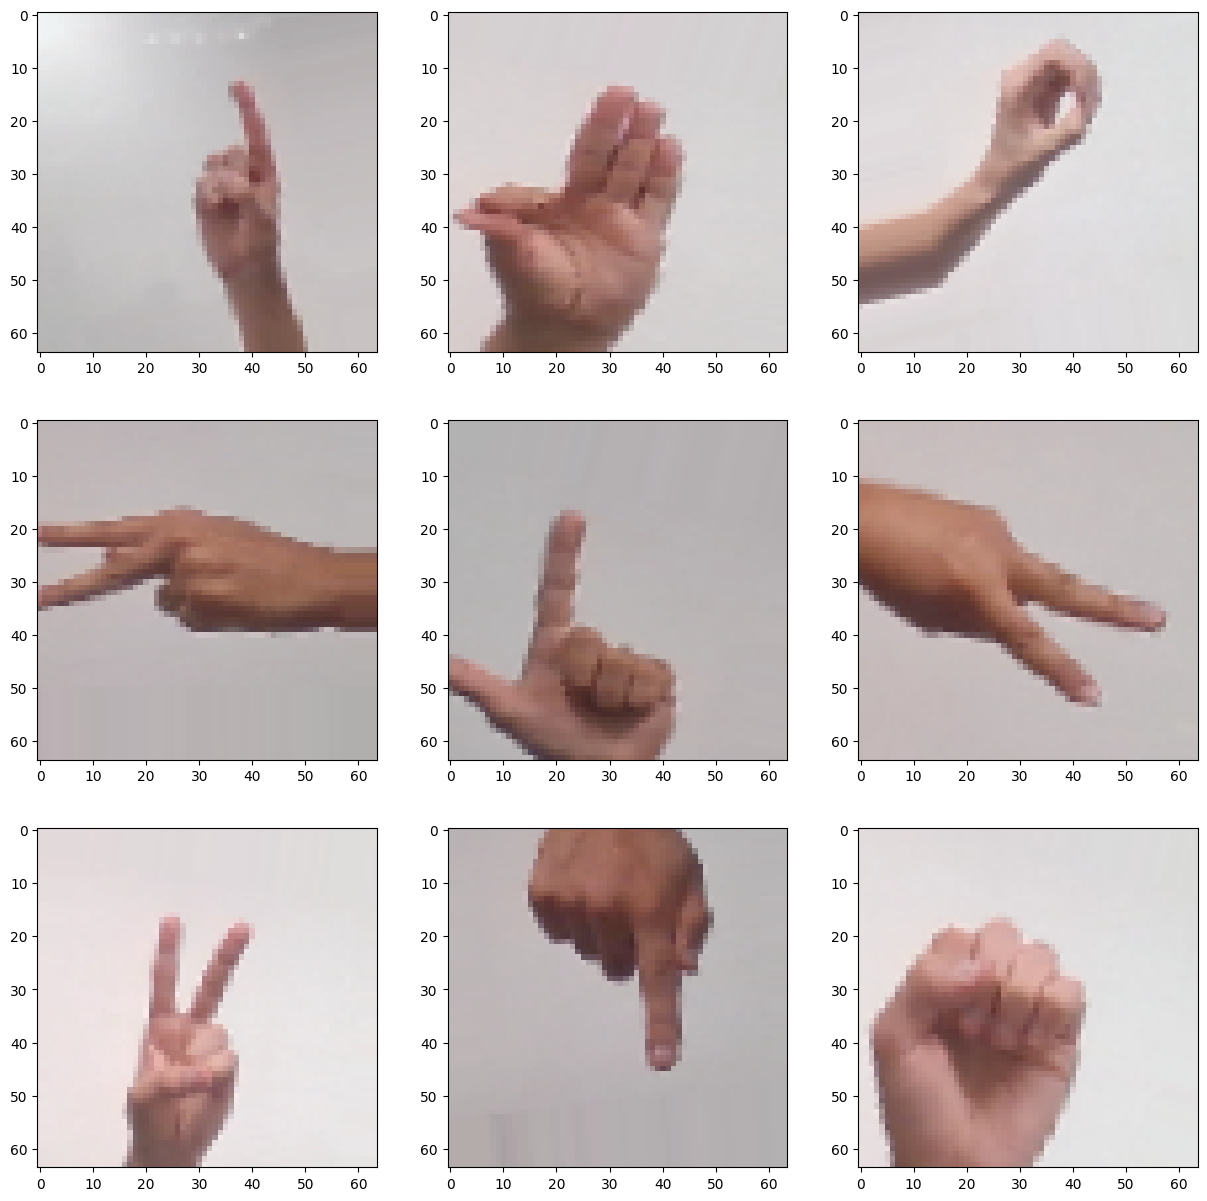

In [20]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    # Generate subplots
    plt.subplot(330 + 1 + i)
    
    # Get the next batch of images
    batch = next(train_generator)[0] * 255
    
    # Convert the image to uint8
    image = batch[0].astype('uint8')
    
    # Display the image
    plt.imshow(image)
    
plt.show()


In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/home/fuzeti/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │        10,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,053 (3.42 MB)

 Trainable params: 896,053 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
epochs = 200

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.keras',  # Change the extension to .keras
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
]


#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/200


/home/fuzeti/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.1704 - loss: 2.6116
Epoch 1: val_loss improved from inf to 0.86138, saving model to model.keras
867/867 ━━━━━━━━━━━━━━━━━━━━ 485s 550ms/step - accuracy: 0.1706 - loss: 2.6111 - val_accuracy: 0.6539 - val_loss: 0.8614
Epoch 2/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.6875 - loss: 0.9970
Epoch 2: val_loss improved from 0.86138 to 0.14728, saving model to model.keras


2024-08-09 19:11:34.908025: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-08-09 19:11:34.986930: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.6875 - loss: 0.9970 - val_accuracy: 1.0000 - val_loss: 0.1473
Epoch 3/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.6375 - loss: 1.0261
Epoch 3: val_loss did not improve from 0.14728
867/867 ━━━━━━━━━━━━━━━━━━━━ 156s 178ms/step - accuracy: 0.6375 - loss: 1.0259 - val_accuracy: 0.8717 - val_loss: 0.3891
Epoch 4/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.9062 - loss: 0.3352
Epoch 4: val_loss improved from 0.14728 to 0.00256, saving model to model.keras


2024-08-09 19:14:11.213089: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9062 - loss: 0.3352 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7982 - loss: 0.5619
Epoch 5: val_loss did not improve from 0.00256
867/867 ━━━━━━━━━━━━━━━━━━━━ 106s 121ms/step - accuracy: 0.7982 - loss: 0.5619 - val_accuracy: 0.8928 - val_loss: 0.2975
Epoch 6/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.8750 - loss: 0.3740
Epoch 6: val_loss improved from 0.00256 to 0.00029, saving model to model.keras
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8750 - loss: 0.3740 - val_accuracy: 1.0000 - val_loss: 2.8526e-04
Epoch 7/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8706 - loss: 0.3729
Epoch 7: val_loss did not improve from 0.00029
867/867 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - accuracy: 0.8706 - loss: 0.3729 - val_accuracy: 0.8814 - val_loss: 0.2797
Epoch 8/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.9062 - lo

2024-08-09 19:17:06.961747: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9000 - loss: 0.2934
Epoch 9: val_loss did not improve from 0.00029
867/867 ━━━━━━━━━━━━━━━━━━━━ 76s 87ms/step - accuracy: 0.9000 - loss: 0.2934 - val_accuracy: 0.9282 - val_loss: 0.1957
Epoch 10/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9375 - loss: 0.1792
Epoch 10: val_loss did not improve from 0.00029
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.9375 - loss: 0.1792 - val_accuracy: 1.0000 - val_loss: 8.9716e-04
Epoch 11/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9187 - loss: 0.2363
Epoch 11: val_loss did not improve from 0.00029
867/867 ━━━━━━━━━━━━━━━━━━━━ 75s 86ms/step - accuracy: 0.9187 - loss: 0.2362 - val_accuracy: 0.9672 - val_loss: 0.0773
Epoch 12/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9375 - loss: 0.2228
Epoch 12: val_loss improved from 0.00029 to 0.00005, saving model to model.keras
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9375 - loss: 0

2024-08-09 19:22:23.944295: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9375 - loss: 0.2803 - val_accuracy: 1.0000 - val_loss: 1.9542e-06
Epoch 17/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9450 - loss: 0.1652
Epoch 17: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.9450 - loss: 0.1652 - val_accuracy: 0.9586 - val_loss: 0.1328
Epoch 18/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 1.0000 - loss: 0.0104
Epoch 18: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 2.7859e-05
Epoch 19/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9535 - loss: 0.1426
Epoch 19: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 85s 97ms/step - accuracy: 0.9535 - loss: 0.1426 - val_accuracy: 0.9792 - val_loss: 0.0558
Epoch 20/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9688 - loss: 0.0801
Epoch 20: val_l

2024-08-09 19:32:31.169909: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9666 - loss: 0.0982
Epoch 33: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 71s 82ms/step - accuracy: 0.9666 - loss: 0.0982 - val_accuracy: 0.9896 - val_loss: 0.0381
Epoch 34/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.9375 - loss: 0.3797
Epoch 34: val_loss improved from 0.00000 to 0.00000, saving model to model.keras
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9375 - loss: 0.3797 - val_accuracy: 1.0000 - val_loss: 1.4050e-06
Epoch 35/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9719 - loss: 0.0869
Epoch 35: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 72s 82ms/step - accuracy: 0.9719 - loss: 0.0869 - val_accuracy: 0.9933 - val_loss: 0.0207
Epoch 36/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9375 - loss: 0.1927
Epoch 36: val_loss improved from 0.00000 to 0.00000, saving model to model.keras
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 411u

2024-08-09 19:55:17.156757: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9790 - loss: 0.0665
Epoch 65: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 77s 88ms/step - accuracy: 0.9790 - loss: 0.0665 - val_accuracy: 0.9942 - val_loss: 0.0169
Epoch 66/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 1.0000 - loss: 0.0030
Epoch 66: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 4.9809e-06
Epoch 67/200
867/867 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9793 - loss: 0.0631
Epoch 67: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 87s 95ms/step - accuracy: 0.9793 - loss: 0.0631 - val_accuracy: 0.9839 - val_loss: 0.0512
Epoch 68/200
  1/867 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.9375 - loss: 0.2044
Epoch 68: val_loss did not improve from 0.00000
867/867 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9375 - loss: 0.2044 - val_accuracy: 1.0000 - val

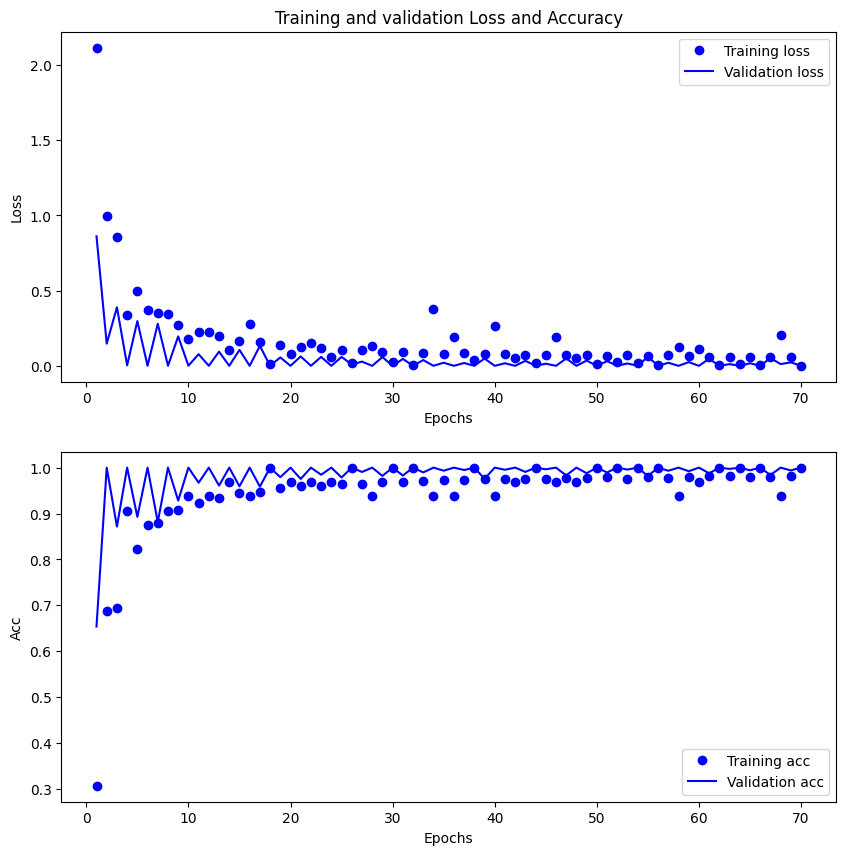

In [25]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [27]:
from tensorflow.keras.models import load_model

model = load_model('model.keras')

In [28]:
# Using the validation dataset
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9886 - loss: 0.0293
Val loss: 0.03973599150776863
Val accuracy: 0.9834293723106384


In [29]:
# Using the test dataset
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 ━━━━━━━━━━━━━━━━━━━━ 132s 366ms/step - accuracy: 0.9942 - loss: 0.0161
Test loss: 0.01646968349814415
Test accuracy: 0.992639422416687


In [30]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

361/361 ━━━━━━━━━━━━━━━━━━━━ 124s 344ms/step
Classification Report
              precision    recall  f1-score   support

           A       1.00      0.99      0.99       579
           B       1.00      0.98      0.99       562
           C       1.00      1.00      1.00       583
           D       0.91      1.00      0.95       550
           E       0.98      1.00      0.99       574
           F       0.97      1.00      0.99       450
           G       1.00      1.00      1.00       550
           I       0.99      1.00      0.99       550
           L       1.00      1.00      1.00       550
           M       1.00      1.00      1.00       550
           N       1.00      1.00      1.00       550
           O       1.00      1.00      1.00       550
           P       1.00      1.00      1.00       550
           Q       1.00      1.00      1.00       550
           R       1.00      0.91      0.95       550
           S       1.00      0.99      1.00       550
           T  

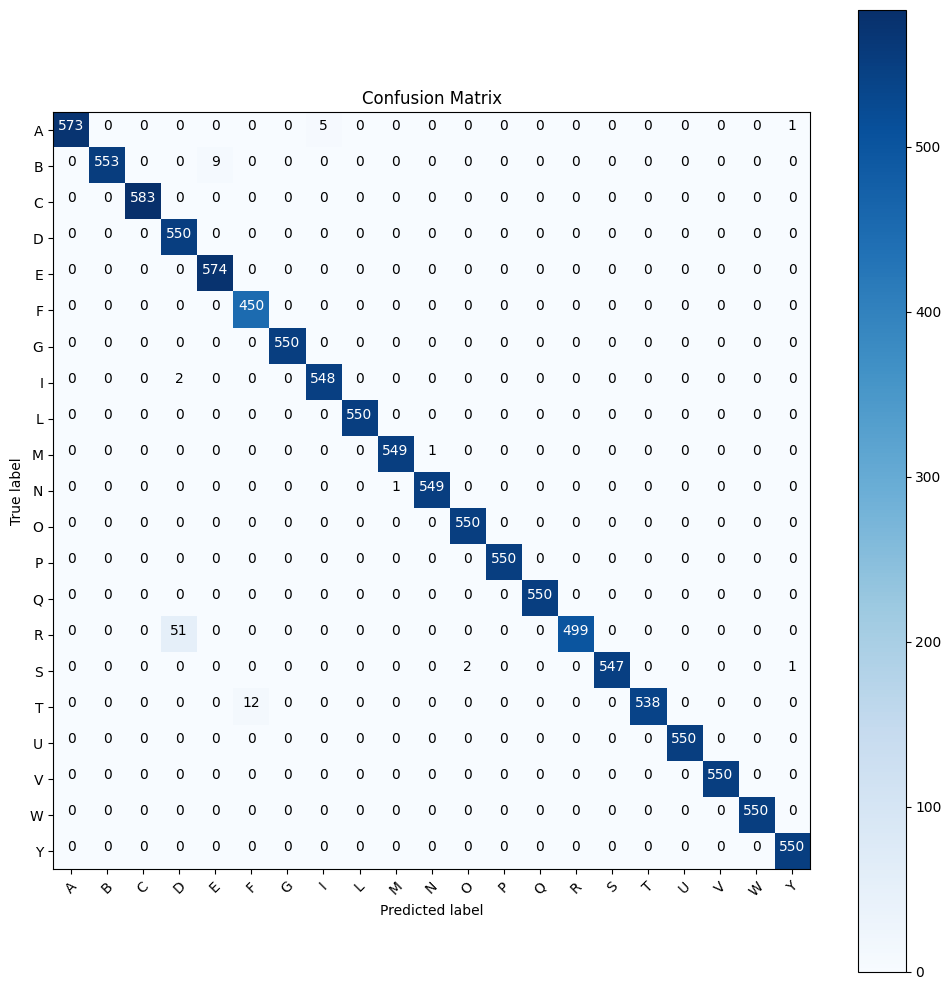

In [32]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))